# Exploratory Data Analsis and Project Scope

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import utils

In [16]:
airports = pd.read_csv('data/airport_codes.csv')
visits = pd.read_csv('data/immigration_data_sample.csv')
cities = pd.read_csv('data/us_cities_demographics.csv', delimiter=';')
temps = pd.read_csv('data/GlobalLandTemperaturesByCity.csv')

---
## Airports

#### Notes
- Use iata_code as unique identifies. IATA = International Airport Transport Association


#### Extract Conditions
- iso_country = "US"
- type = "large_airport" or "medium_airport"


#### Errors
- Duplicate values
- Missing values - Do not accep

In [3]:
airports.type.unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

In [4]:
usa_med_large = airports[((airports.type == 'medium_airport') |
                          (airports.type == 'large_airport')) &
                         (airports.iso_country == 'US')].copy()
usa_med_large.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
6188,5A8,medium_airport,Aleknagik / New Airport,66.0,NaN,US,US-AK,Aleknagik,5A8,WKK,5A8,"-158.617996216, 59.2826004028"
25825,K79J,medium_airport,South Alabama Regional At Bill Benton Field Ai...,310.0,NaN,US,US-AL,Andalusia/Opp,K79J,NaN,79J,"-86.393799, 31.3088"
26005,KABE,medium_airport,Lehigh Valley International Airport,393.0,NaN,US,US-PA,Allentown,KABE,ABE,ABE,"-75.44080352783203, 40.652099609375"
26006,KABI,medium_airport,Abilene Regional Airport,1791.0,NaN,US,US-TX,Abilene,KABI,ABI,ABI,"-99.68190002440001, 32.4113006592"
26007,KABQ,large_airport,Albuquerque International Sunport,5355.0,NaN,US,US-NM,Albuquerque,KABQ,ABQ,ABQ,"-106.609001, 35.040199"


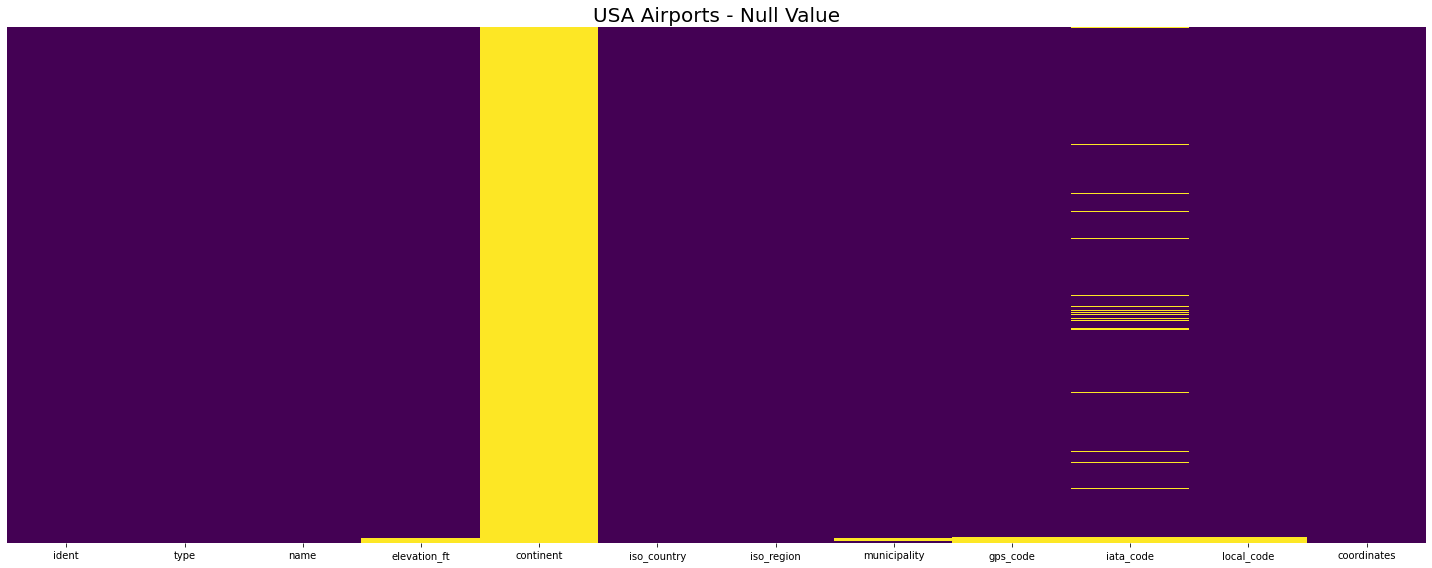

In [5]:
utils.plot_null_val_heatmap(usa_med_large, "USA Airports - Null Value", (20,8))

---
## USA Cities Demographics

#### Notes
- Can I join the `cities` dataset to `airports` dataset by the `City` feature  to the `municipality` feature?

In [26]:
cities.tail()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
2886,Stockton,California,32.5,150976.0,154674.0,305650,12822.0,79583.0,3.16,CA,American Indian and Alaska Native,19834
2887,Southfield,Michigan,41.6,31369.0,41808.0,73177,4035.0,4011.0,2.27,MI,American Indian and Alaska Native,983
2888,Indianapolis,Indiana,34.1,410615.0,437808.0,848423,42186.0,72456.0,2.53,IN,White,553665
2889,Somerville,Massachusetts,31.0,41028.0,39306.0,80334,2103.0,22292.0,2.43,MA,American Indian and Alaska Native,374
2890,Coral Springs,Florida,37.2,63316.0,66186.0,129502,4724.0,38552.0,3.17,FL,White,90896


In [7]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    2891 non-null   object 
 1   State                   2891 non-null   object 
 2   Median Age              2891 non-null   float64
 3   Male Population         2888 non-null   float64
 4   Female Population       2888 non-null   float64
 5   Total Population        2891 non-null   int64  
 6   Number of Veterans      2878 non-null   float64
 7   Foreign-born            2878 non-null   float64
 8   Average Household Size  2875 non-null   float64
 9   State Code              2891 non-null   object 
 10  Race                    2891 non-null   object 
 11  Count                   2891 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 271.2+ KB


---
## Visits

In [17]:
visits.rename({'Unnamed: 0': 'visit_id'}, axis=1, inplace=True)
visits.head()

,visit_id,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,2027561,4084316.0,2016.0,4.0,209.0,209.0,HHW,20566.0,1.0,HI,...,NaN,M,1955.0,07202016,F,NaN,JL,5.658267e+10,00782,WT
1,2171295,4422636.0,2016.0,4.0,582.0,582.0,MCA,20567.0,1.0,TX,...,NaN,M,1990.0,10222016,M,NaN,*GA,9.436200e+10,XBLNG,B2
2,589494,1195600.0,2016.0,4.0,148.0,112.0,OGG,20551.0,1.0,FL,...,NaN,M,1940.0,07052016,M,NaN,LH,5.578047e+10,00464,WT
3,2631158,5291768.0,2016.0,4.0,297.0,297.0,LOS,20572.0,1.0,CA,...,NaN,M,1991.0,10272016,M,NaN,QR,9.478970e+10,00739,B2
4,3032257,985523.0,2016.0,4.0,111.0,111.0,CHM,20550.0,3.0,NY,...,NaN,M,1997.0,07042016,F,NaN,NaN,4.232257e+10,LAND,WT


In [18]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   visit_id  1000 non-null   int64  
 1   cicid     1000 non-null   float64
 2   i94yr     1000 non-null   float64
 3   i94mon    1000 non-null   float64
 4   i94cit    1000 non-null   float64
 5   i94res    1000 non-null   float64
 6   i94port   1000 non-null   object 
 7   arrdate   1000 non-null   float64
 8   i94mode   1000 non-null   float64
 9   i94addr   941 non-null    object 
 10  depdate   951 non-null    float64
 11  i94bir    1000 non-null   float64
 12  i94visa   1000 non-null   float64
 13  count     1000 non-null   float64
 14  dtadfile  1000 non-null   int64  
 15  visapost  382 non-null    object 
 16  occup     4 non-null      object 
 17  entdepa   1000 non-null   object 
 18  entdepd   954 non-null    object 
 19  entdepu   0 non-null      float64
 20  matflag   954 non-null    objec

In [25]:
for idx, col in enumerate(sorted(visits)):
    print(f"{idx}) {col}")

0) admnum
1) airline
2) arrdate
3) biryear
4) cicid
5) count
6) depdate
7) dtaddto
8) dtadfile
9) entdepa
10) entdepd
11) entdepu
12) fltno
13) gender
14) i94addr
15) i94bir
16) i94cit
17) i94mode
18) i94mon
19) i94port
20) i94res
21) i94visa
22) i94yr
23) insnum
24) matflag
25) occup
26) visapost
27) visatype
28) visit_id


---
## Global Temperatures

In [11]:
temps.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
8599211,2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


In [12]:
sorted(temps.Country.unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia',
 'Bosnia And Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Congo (Democratic Republic Of The)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte D'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jorda

---
## Aggregation

In [30]:
labels = pd.read_sas('data/I94_SAS_Labels_Descriptions.sas', 'sas7bdat', encoding="ISO-8859-1")

ValueError: magic number mismatch (not a SAS file?)

In [29]:
# Number of cities that exist in BOTH "cities" and "usa_med_large" dfs.
# "cities" has a total of 2,891 cities.
len(set(cities.City).intersection(set(usa_med_large.municipality)))

217